In [83]:
!pip install pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Reading the file

df=pd.read_csv("Company Stock and Investment.csv")
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [85]:
# Going ahead with only Comp Stock
#Modellling for Comp Stock only

df.drop(['Gold Investments','Oil Investments','Other sharesInvestments'], axis = 1, inplace=True)
df

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849
...,...,...
1979,09-11-2017,-0.002043
1980,10-11-2017,-0.006880
1981,13-11-2017,-0.004008
1982,14-11-2017,-0.015118


In [86]:
# Checking columns have null values
df.isnull().sum().sort_values(ascending=False)

Comp Stock    0
Date          0
dtype: int64

In [87]:
# Convert Date object type to Datetime

df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-04-01,0.015565
2,2010-05-01,0.001729
3,2010-06-01,-0.015906
4,2010-07-01,-0.001849


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1984 non-null   datetime64[ns]
 1   Comp Stock  1984 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.1 KB


In [89]:
df.set_index('Date',inplace=True)
df.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


In [90]:
df.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


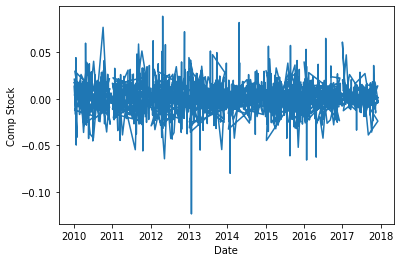

In [91]:
plt.xlabel("Date")
plt.ylabel("Comp Stock")
plt.plot(df)
#plt.figsize(20,10)
#df.plot()


In [92]:
#df.drop(df[df['Gold Investments']==-1].index, inplace=True)
#df.plot(figsize=(20,10))
#df.plot()

# determining rolling statistics

rolmean=df.rolling(window=30).mean()

rolstd=df.rolling(window=30).std()
print(rolmean,rolstd)

            Comp Stock
Date                  
2009-12-31         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
...                ...
2017-09-11    0.004658
2017-10-11    0.004246
2017-11-13    0.004179
2017-11-14    0.003530
2017-11-15    0.003306

[1984 rows x 1 columns]             Comp Stock
Date                  
2009-12-31         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01         NaN
...                ...
2017-09-11    0.011414
2017-10-11    0.011605
2017-11-13    0.011647
2017-11-14    0.012168
2017-11-15    0.012418

[1984 rows x 1 columns]


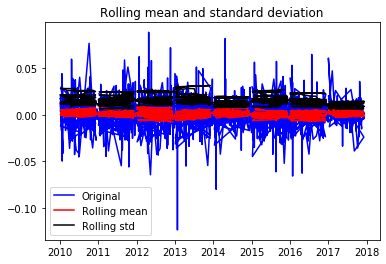

In [93]:
#Plotting rolling statistics

orig=plt.plot(df, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling mean')
std=plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [94]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [95]:
test_results=adfuller(df['Comp Stock'])

In [96]:
test_results

(-12.473386265908276,
 3.207774293089398e-23,
 12,
 1971,
 {'1%': -3.4336720887549483,
  '5%': -2.863007508094813,
  '10%': -2.567551240570721},
 -10649.854659769328)

In [97]:
# Hypothesis testing - H1: it is stationary
def adfuller_test(stockprice):
    result=adfuller(stockprice)
    label=['ADF Test Statistic', 'p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,label):
        print(label+': '+str(value))
    if result[1]    <=0.05:
        print("Strong evidence against null hypotheses(Ho), reject the null hypothesis. Data is stationary...")
    else:
        print("Weak evidence against null hypotheses, Time series is non-stationary...")
    

In [98]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic: -12.473386265908276
p-value: 3.207774293089398e-23
#Lags Used: 12
Number of Observations Used: 1971
Strong evidence against null hypotheses(Ho), reject the null hypothesis. Data is stationary...


In [99]:
from statsmodels.tsa.arima_model import ARIMA

In [100]:
#model=ARIMA(df['Gold Investments'],order=(2,1,2))
model=ARIMA(df,order=(0,1,0))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [101]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4721.508
Method:                           css   S.D. of innovations              0.022
Date:                Sun, 01 Nov 2020   AIC                          -9439.016
Time:                        21:34:13   BIC                          -9427.831
Sample:                             1   HQIC                         -9434.908
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.54e-05      0.001     -0.031      0.976      -0.001       0.001
==============================================================================
"""

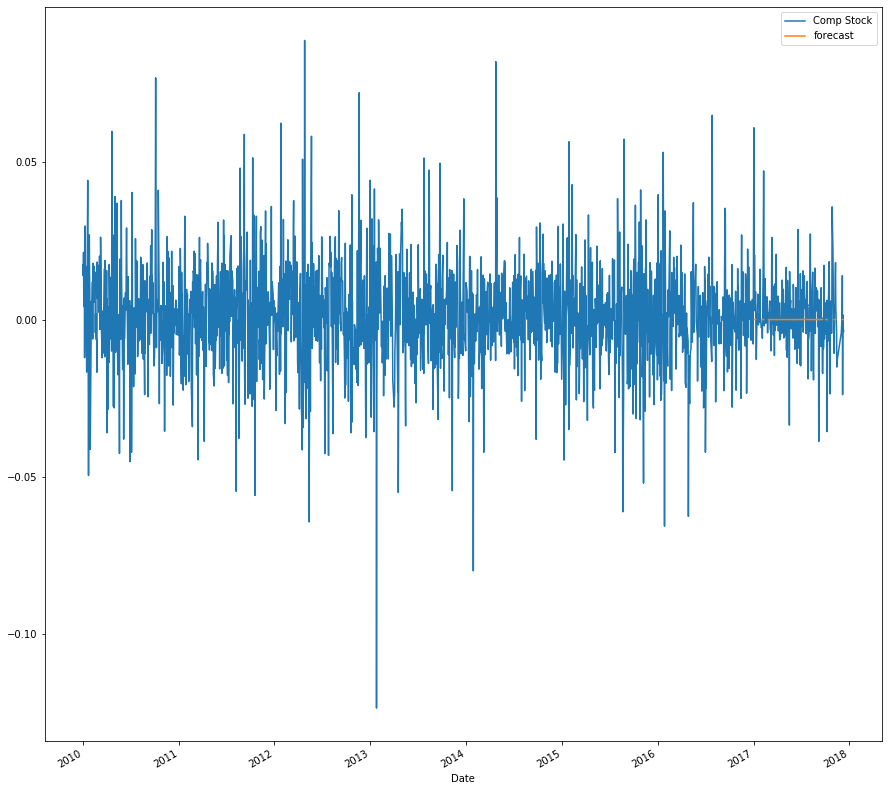

In [102]:
df['forecast']=model_fit.predict(start=1800,end=1943, dynamic=True)
df[['Comp Stock','forecast']].plot(figsize=(15,15))

In [103]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('2017-11-15 00:00:00'),
 Timestamp('2017-12-15 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-02-15 00:00:00'),
 Timestamp('2018-03-15 00:00:00'),
 Timestamp('2018-04-15 00:00:00'),
 Timestamp('2018-05-15 00:00:00'),
 Timestamp('2018-06-15 00:00:00'),
 Timestamp('2018-07-15 00:00:00'),
 Timestamp('2018-08-15 00:00:00'),
 Timestamp('2018-09-15 00:00:00'),
 Timestamp('2018-10-15 00:00:00'),
 Timestamp('2018-11-15 00:00:00'),
 Timestamp('2018-12-15 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-02-15 00:00:00'),
 Timestamp('2019-03-15 00:00:00'),
 Timestamp('2019-04-15 00:00:00'),
 Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-07-15 00:00:00'),
 Timestamp('2019-08-15 00:00:00'),
 Timestamp('2019-09-15 00:00:00'),
 Timestamp('2019-10-15 00:00:00')]

In [104]:
import pandas as pd
future_dataset=pd.dataFrame(index=future_dates,columns=df.columns)

AttributeError: module 'pandas' has no attribute 'dataFrame'